In [13]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'
            }

response = requests.get('https://www.yelp.com/biz/citi-bike-new-york', headers=headers).text
soup = BeautifulSoup(response, 'html.parser')

In [14]:
import re
num_reviews = soup.find('span', attrs={'class': 'review-count rating-qualifier'}).string
num_reviews = int(re.search('\d+', num_reviews).group())  
print(num_reviews)

435


In [15]:
url_list = []
for i in range(0, num_reviews, 20):
    url_list.append('https://www.yelp.com/biz/citi-bike-new-york-6?start='+str(i))
print(url_list[:10])

['https://www.yelp.com/biz/citi-bike-new-york-6?start=0', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=20', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=40', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=60', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=80', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=100', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=120', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=140', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=160', 'https://www.yelp.com/biz/citi-bike-new-york-6?start=180']


In [16]:
reviews = soup.find_all('div', attrs={'class':'review review--with-sidebar'})
print(len(reviews))

20


In [17]:
review = reviews[0]

username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).string
print(username)

ML S.


In [18]:
location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).get_text()
print(location)


New York, NY



In [19]:
rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
rating = float(re.search('\d+', rating).group())
print(rating)

4.0


In [20]:
date = review.find('span', attrs={'class': 'rating-qualifier'}).get_text()
print(date)


        5/5/2019
    


In [21]:
content = review.find('p').get_text()
print(content)

CitiBike upgraded my life: it saves me tons of time by providing for a solution for those distances that are too awkward for public transport and it saves me tons of money on the cabs I no longer need to take. I do have two suggestions. As I've written to Lyft: since docking stations around 1st Ave and 44th Street are ALWAYS full later in the morning and empty later in the evening, why not get a valet docking station in the area? And since Lyft sent me useless responses to my messages: get rid of it and provide customer service like you used to, with a live person on the phone.


In [64]:
import csv

with open('reviews.csv', 'w', encoding='utf-8') as csvfile:
    review_writer = csv.writer(csvfile)
    for review in reviews:
        dic = {}
        username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).string
        location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).get_text().strip()
        date = review.find('span', attrs={'class': 'rating-qualifier'}).get_text().strip()
        rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
        rating = float(re.search('\d+', rating).group())
        content = review.find('p').get_text()
        dic['username'] = username
        dic['location'] = location
        dic['date'] = date
        dic['rating'] = rating
        dic['content'] = content
        review_writer.writerow(dic.values())

In [65]:
import time
import random

def scrape_single_page(reviews, csvwriter):
    for review in reviews:
        dic = {}
        username = review.find('a', attrs={'class': 'user-display-name js-analytics-click'}).string
        location = review.find('li', attrs={'class': 'user-location responsive-hidden-small'}).get_text().strip()
        date = review.find('span', attrs={'class': 'rating-qualifier'}).get_text().strip()
        rating = review.find('img', attrs={'class': 'offscreen'}).get('alt')
        rating = float(re.search('\d+', rating).group())
        content = review.find('p').get_text()
        dic['username'] = username
        dic['location'] = location
        dic['date'] = date
        dic['rating'] = rating
        dic['content'] = content
        csvwriter.writerow(dic.values())

with open('reviews.csv', 'w', encoding='utf-8', newline='') as csvfile:
    review_writer = csv.writer(csvfile)
    for index, url in enumerate(url_list):
        response = requests.get(url, headers=headers).text
        soup = BeautifulSoup(response, 'html.parser')
        reviews = soup.find_all('div', attrs={'class': 'review review--with-sidebar' })
        scrape_single_page(reviews, review_writer)
        time.sleep(random.randint(1,3))
        print('Finished page ' + str(index + 1))

Finished page 1
Finished page 2
Finished page 3
Finished page 4
Finished page 5
Finished page 6
Finished page 7
Finished page 8
Finished page 9
Finished page 10
Finished page 11
Finished page 12
Finished page 13
Finished page 14
Finished page 15
Finished page 16
Finished page 17
Finished page 18
Finished page 19
Finished page 20
Finished page 21
Finished page 22


In [223]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [274]:
df = pd.read_csv('reviews.csv')
df.columns=['Username','Location','Date','Rating','Content']
df.to_csv('Citi_Reviews.csv')

df.head()

,Username,Location,Date,Rating,Content
0,Heloise P.,"Palm Desert, CA",7/12/2019,2.0,***All day pass $12 in big letters but docking...
1,Barbara D.,"Chicago, IL",8/24/2019,1.0,We watched a movie on this. We read about it. ...
2,MaraLee E.,"New York, NY",8/16/2019\n \n\n\n\n\n\nUpdated review,2.0,Want to say I just went to London and Amsterda...
3,Matt H.,"North Salt Lake, UT",9/29/2019,1.0,Horrible experience. Purchased on a whim and p...
4,Roman M.,"Brooklyn, Brooklyn, NY",9/24/2019,1.0,Avoid.I just finished my ride and docked the b...


In [264]:
# df['Rating']= df['Rating'].astype(int)
# df.head()

,Username,Location,Date,Rating,Content
0,Heloise P.,"Palm Desert, CA",7/12/2019,2,***All day pass $12 in big letters but docking...
1,Barbara D.,"Chicago, IL",8/24/2019,1,We watched a movie on this. We read about it. ...
2,MaraLee E.,"New York, NY",8/16/2019\n \n\n\n\n\n\nUpdated review,2,Want to say I just went to London and Amsterda...
3,Matt H.,"North Salt Lake, UT",9/29/2019,1,Horrible experience. Purchased on a whim and p...
4,Roman M.,"Brooklyn, Brooklyn, NY",9/24/2019,1,Avoid.I just finished my ride and docked the b...


Text(0.5, 1.0, 'Histogram of Yelp Ratings')

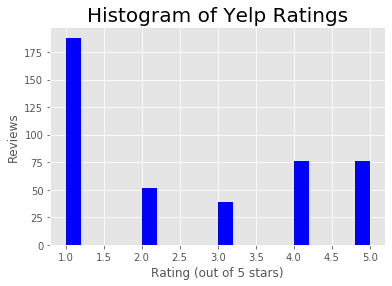

In [291]:
plt.hist(df['Rating'], bins=20, color="#5ee3ff")
plt.xlabel('Rating (out of 5 stars)')
plt.ylabel('Reviews')
plt.title('Histogram of Yelp Ratings', fontsize=20)

In [78]:
df.describe()

,Rating
count,431.000000
mean,2.535963
std,1.593003
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [80]:
df['Location'].value_counts()

New York, NY                              87
Manhattan, NY                             59
Brooklyn, NY                              36
Manhattan, New York, NY                   17
Los Angeles, CA                            7
Atlanta, GA                                6
Queens, NY                                 6
Seattle, WA                                5
San Francisco, CA                          5
Jersey City, NJ                            5
Miami, FL                                  5
Boston, MA                                 5
Brooklyn, Brooklyn, NY                     4
Chicago, IL                                4
Washington, DC                             4
Philadelphia, PA                           3
Flushing, NY                               3
Bronx, NY                                  3
Austin, TX                                 3
Houston, TX                                3
West Hollywood, CA                         3
San Diego, CA                              2
White Plai

In [96]:
df[df['Location'].str.contains('NY')].describe()

,Rating
count,259.000000
mean,2.722008
std,1.604239
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [98]:
df[df['Location'].str.contains('NY')==False].describe()

,Rating
count,172.000000
mean,2.255814
std,1.538481
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,5.000000


In [196]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
df = pd.read_csv('reviews.csv', index_col=4)
citi_reviews=(df.astype('str'))

In [198]:
STOPWORDS.update(['Citi', 'Bike', 'Citibike', 'New York', 'NY', 'New','York', 'Manhattan', 'Brooklyn'])

In [209]:
### THE FOLLOWING COMMENTED CODE DID NOT WORK, HOWEVER I WOULD LIKE TO REVIST AT SOME POINT

# nycmask = np.array(Image.open('NYC3.png'))
# nycmask

In [205]:
# def transform_format(val):
#     if val == 0:
#         return 255
#     else:
#         return val

In [208]:
# bikemask2 = np.ndarray((bikemask.shape[0],bikemask.shape[1]), np.int32)

# for i in range(len(bikemask)):
#     bikemask2[i] = list(map(transform_format, bikemask[i]))


In [177]:
# df = pd.read_csv('reviews.csv', index_col=4)
# citi_reviews=(df.astype('str'))

In [207]:
# # Create wordcloud image
# citi_wc = WordCloud(background_color="white", max_words=1000, mask=transformed_bikemask,
#                stopwords=STOPWORDS, contour_width=3, contour_color='mediumblue')

# # Generate a wordcloud
# citi_wc.generate(str(citi_reviews))

# # Show wordcloud
# plt.figure(figsize=[20,10])
# plt.imshow(citi_wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()

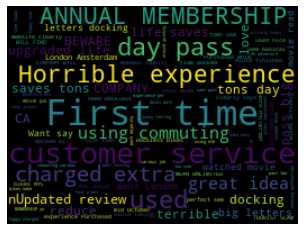

In [117]:
citi_cloud= WordCloud(mask=mask).generate(str(citi_reviews))
plt.figure()
plt.imshow(citi_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

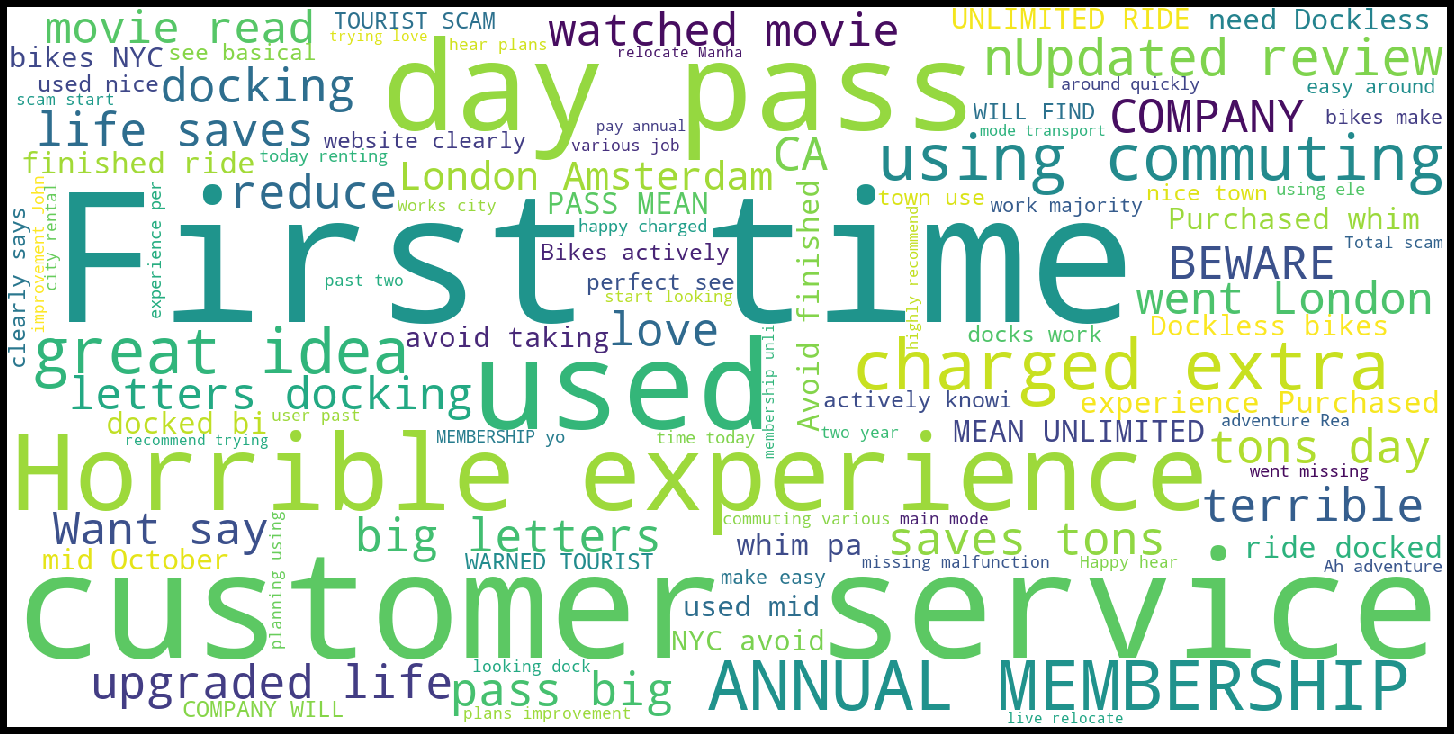

In [282]:
wordcloud = WordCloud(max_words=100, background_color="white", width=1600, height=800).generate(str(citi_reviews))
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()